In [87]:
import pandas as pd

In [88]:
stocks_symbols = pd.read_csv('stock_list.csv')

In [89]:
stock_data = pd.read_csv('stock_data.csv')

In [90]:
stock_data.head()

,beta,bookValuePerShare,currentRatio,divGrowthRate3Year,dividendAmount,dividendDate,dividendPayAmount,dividendPayDate,dividendYield,epsChange,...,revChangeYear,sharesOutstanding,shortIntDayToCover,shortIntToFloat,symbol,totalDebtToCapital,totalDebtToEquity,vol10DayAvg,vol1DayAvg,vol3MonthAvg
0,1.21802,2.79895,1.31538,0.0,3.080000,2019-05-10 00:00:00.0,0.770000,2019-08-16 00:00:00.0,1.57,0.0,...,0.0,4601.07500,0.0,0.0,AAPL,51.54927,106.3952,22963900.0,22963900.0,585636010.0
1,2.35784,0.00000,18.20330,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,63.78077,0.0,0.0,ADVM,0.00000,0.0000,625225.0,625220.0,13701860.0
2,0.85623,31.06079,3.46119,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,59.12744,0.0,0.0,AAXN,0.00000,0.0000,1287277.0,1287280.0,15188870.0
3,0.66686,0.00000,6.23734,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,...,0.0,50.06428,0.0,0.0,ACTG,0.00000,0.0000,104801.0,104800.0,2676700.0
4,0.94418,0.00000,0.00000,0.0,1.338665,2019-06-17 00:00:00.0,0.411154,2019-12-23 00:00:00.0,1.95,0.0,...,0.0,58.80000,0.0,0.0,AAXJ,0.00000,0.0000,736602.0,736600.0,29469660.0


We select only 3 attributes

In [91]:
#separate the useful features
metrics_list = ['returnOnEquity', 'returnOnAssets', 'returnOnInvestment', 'symbol']

#make a separate dataframe
indicators_df = stock_data[metrics_list]

#print the dataframe
indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.8055,21.30287,AAPL
1,0.00000,0.0000,0.00000,ADVM
2,6.76543,4.0626,5.47783,AAXN
3,0.00000,0.0000,0.00000,ACTG
4,0.00000,0.0000,0.00000,AAXJ


In [92]:
indicators_df.isnull().sum()

returnOnEquity        0
returnOnAssets        0
returnOnInvestment    0
symbol                0
dtype: int64

In [93]:
#Handling missing values(zero values)
indicators_df = indicators_df[indicators_df[metrics_list] != 0]
indicators_df = indicators_df.dropna()

#check the new df
indicators_df.head()


,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.80550,21.30287,AAPL
2,6.76543,4.06260,5.47783,AAXN
5,45.43475,30.16776,36.04312,ADES
6,12.91672,3.53989,4.31677,ACCO
12,12.08748,4.19331,4.94682,AAWW


In [94]:
#set the index
indicators_df = indicators_df.set_index('symbol')
print(indicators_df.index.name)

symbol


In [95]:
#check the data type
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2102 entries, AAPL to ZYXI
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   returnOnEquity      2102 non-null   float64
 1   returnOnAssets      2102 non-null   float64
 2   returnOnInvestment  2102 non-null   float64
dtypes: float64(3)
memory usage: 65.7+ KB


In [96]:
indicators_df.head()

,returnOnEquity,returnOnAssets,returnOnInvestment
symbol,,,
AAPL,48.18294,15.80550,21.30287
AAXN,6.76543,4.06260,5.47783
ADES,45.43475,30.16776,36.04312
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682


In [97]:
#Handling Outliers

#defining the filters
roe_filter = indicators_df.iloc[:,0] < 40
roa_filter = indicators_df.iloc[:,1] < 30
roi_filter = indicators_df.iloc[:,2] < 30

#Checking the number of outliers
print(pd.Series(roe_filter).value_counts())
print(pd.Series(roa_filter).value_counts())
print(pd.Series(roi_filter).value_counts())

returnOnEquity
True     1909
False     193
Name: count, dtype: int64
returnOnAssets
True     2058
False      44
Name: count, dtype: int64
returnOnInvestment
True     2021
False      81
Name: count, dtype: int64


In [98]:
#filter the entire dataframe
indicators_df = indicators_df[roe_filter & roa_filter & roi_filter]

#shape of new dataframe
indicators_df.shape

(1886, 3)

In [99]:
#Creating a statistical summary
desc_df = indicators_df.describe()

#add standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df

,returnOnEquity,returnOnAssets,returnOnInvestment
count,1886.000000,1886.000000,1886.000000
mean,12.588871,5.964759,7.578311
std,8.701498,4.582212,5.824265
min,0.044180,0.036950,0.041490
25%,5.750330,2.577993,3.136615
50%,11.045815,4.765765,6.151425
75%,17.580588,8.168385,10.504722
max,39.538890,26.093900,29.889750
+3_std,38.693367,19.711394,25.051107
-3_std,-13.515624,-7.781876,-9.894485


In [100]:
#Plotting the data
import plotly.express as px
fig = px.scatter_3d(indicators_df , x = 'returnOnEquity', y = 'returnOnAssets', z = 'returnOnInvestment',width=600, height=600)
fig.show()

In [101]:
#Scaling the data

from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
original_index = indicators_df.index

scaled_array = robust_scaler.fit_transform(indicators_df)
indicators_df = pd.DataFrame(scaled_array, columns = indicators_df.columns, index=original_index)

#plot the data again
fig = px.scatter_3d(indicators_df , x = 'returnOnEquity', y = 'returnOnAssets', z = 'returnOnInvestment',width=600, height=600)
fig.show()

In [102]:
#Building the model
from sklearn.cluster import KMeans
from sklearn import metrics

#creating a dictionary to store our scores
result_dict = {}

#defining the number of iterarions
no_of_clusters = 10

for k in range(2, no_of_clusters):

    print('_' *100)

    #defining the key for this iteration
    result_dict[k] = {}

    #creating the model
    kmeans = KMeans(n_clusters= k, random_state = 0).fit(indicators_df)

    #defining silhouette score
    sil_score = metrics.silhouette_score(indicators_df, kmeans.labels_, metric = 'euclidean')

    #storing different metrics
    result_dict[k]['silhouette_score'] = sil_score
    result_dict[k]['inertia'] = kmeans.inertia_
    result_dict[k]['score'] = kmeans.score
    result_dict[k]['model'] = kmeans

    #printing the results
    print('the number of clusters : {}'.format(k))
    print('the silhouette score : {}'.format(sil_score))

____________________________________________________________________________________________________
the number of clusters : 2
the silhouette score : 0.5409025131522358
____________________________________________________________________________________________________
the number of clusters : 3
the silhouette score : 0.4715762202588651
____________________________________________________________________________________________________
the number of clusters : 4
the silhouette score : 0.4073860864605897
____________________________________________________________________________________________________
the number of clusters : 5
the silhouette score : 0.38014530345371883
____________________________________________________________________________________________________
the number of clusters : 6
the silhouette score : 0.39534907281319576
____________________________________________________________________________________________________
the number of clusters : 7
the silhouette score

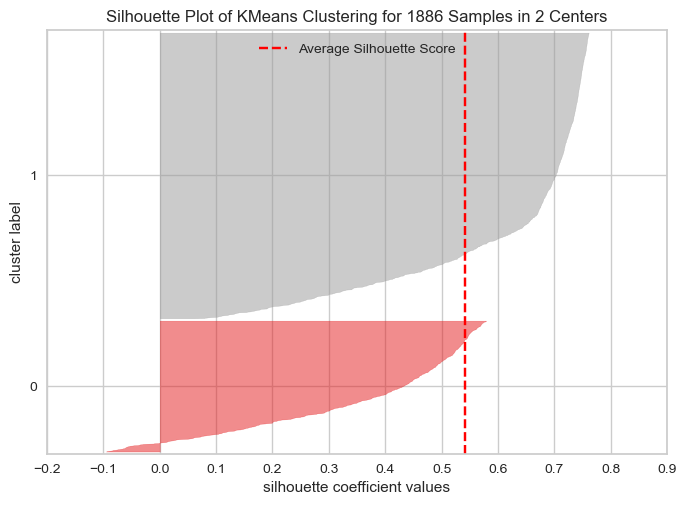

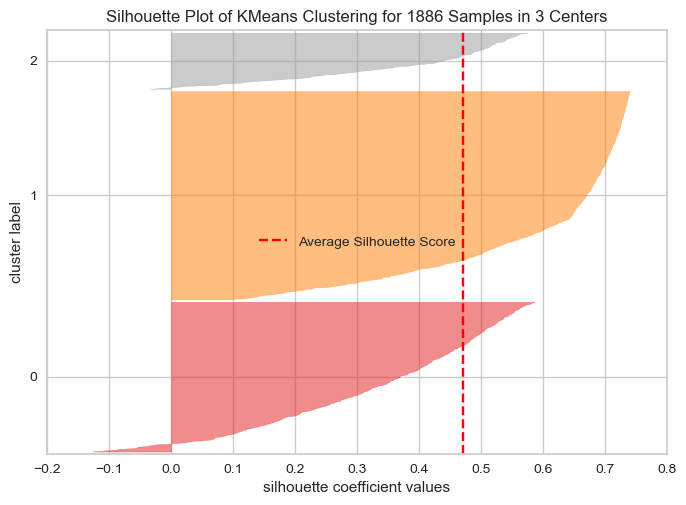

In [103]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,3]

for cluster in clusters:

    #creating instance of the model
    kmeans = KMeans(n_clusters= cluster, random_state = 0)

    #passing the model through visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    #passing the data
    visualizer.fit(indicators_df)

    #show the chart
    visualizer.poof()

In [104]:
#plotting the clustered data
clusters = [2,3]

for cluster in clusters:
    print('_'*100)

    #creating the instance of model
    kmeans = KMeans(n_clusters= cluster, random_state = 0).fit(indicators_df)

    fig = px.scatter_3d(indicators_df , x = 'returnOnEquity', y = 'returnOnAssets', z = 'returnOnInvestment', color=kmeans.labels_, width=600, height=600)
    fig.show()

____________________________________________________________________________________________________


____________________________________________________________________________________________________


In [107]:
#We will consider 3 clusters 

kmeans = KMeans(n_clusters= 3, random_state = 0).fit(indicators_df)
indicators_df['Labels'] = kmeans.labels_

#separating cluster-wise data
cluster_0 = indicators_df[indicators_df['Labels'] == 0].index.tolist()
cluster_1 = indicators_df[indicators_df['Labels'] == 1].index.tolist()
cluster_2 = indicators_df[indicators_df['Labels'] == 2].index.tolist()


In [108]:
#Making predictions

#grab the model
kmeans = result_dict[3]['model']

test_data = [[0.10, 3.10, 5.20],
            [0.60, 5.10, 2.20]]

kmeans.predict(test_data)

C:\Users\saish\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([2, 2])